# Revision de datos y Caracteristicas

In [1]:
import pandas as pd
import numpy as np
import json
import warnings
import requests
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")

In [2]:
def invocarApi(version,dataframe):
    url = "http://127.0.0.1:8000/"+str(version)+"/predict"
    response = requests.post(url,dataframe)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Error en la solicitud. Código de estado:", response.status_code)
        print("Contenido de error:", response.text)
        return []

In [3]:
def crearDFresultados(lista,dia,modelo):
    dataframeModel = pd.DataFrame(lista)
    dataframeModel['Modelo'] = modelo
    dataframeModel['Dia'] = dia
    return dataframeModel

In [4]:
dataChurn = pd.read_json('Archivos/churn_future.json')

### Limpieza Dataframe

In [5]:
dataChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [6]:
dataChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

In [7]:
#TotalCharges es una columna que debería ser tipo float64 pero contiene valores tipo string que hay que modificar
#Este codigo convierte toda la columna a valores numericos y si hay valores que no se pueden convertir los imputa con un NaN
dataChurn['TotalCharges'] = pd.to_numeric(dataChurn['TotalCharges'], errors='coerce')
#Observamos e nuevo la composición del dataset
dataChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

In [8]:
#Reemplazamos con la media los valores nulos de la columna TotalCharges
dataChurn["TotalCharges"]=dataChurn["TotalCharges"].fillna(dataChurn["TotalCharges"].mean())
#Observamos resultado final
dataChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

### Analisis de caracteristicas

count    1000.000000
mean       32.673000
std        24.067308
min         0.000000
25%        10.000000
50%        30.000000
75%        54.000000
max        72.000000
Name: tenure, dtype: float64

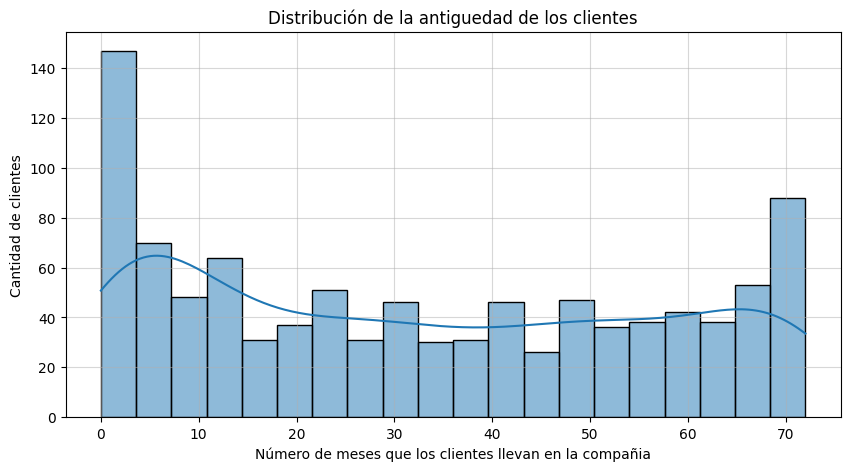

In [9]:
#distribución de la variable 'Tenure'
plt.figure(figsize=(10, 5))
sns.histplot(dataChurn['tenure'], kde=True,bins=20)
plt.title("Distribución de la antiguedad de los clientes")
plt.xlabel("Número de meses que los clientes llevan en la compañia")
plt.ylabel("Cantidad de clientes")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 200+10, step=10))
plt.plot()
#miramos la distribución de los datos
dataChurn['tenure'].describe()

Se observa que alrededopr del 14% de los clientes llevan aproximadamente en la compañia. Por otro lado, aproximadamente el 8% de los clientes llevan alrededor de 6 años.

count    1000.000000
mean       65.634400
std        29.516871
min        18.700000
25%        42.862500
50%        70.475000
75%        90.050000
max       116.450000
Name: MonthlyCharges, dtype: float64

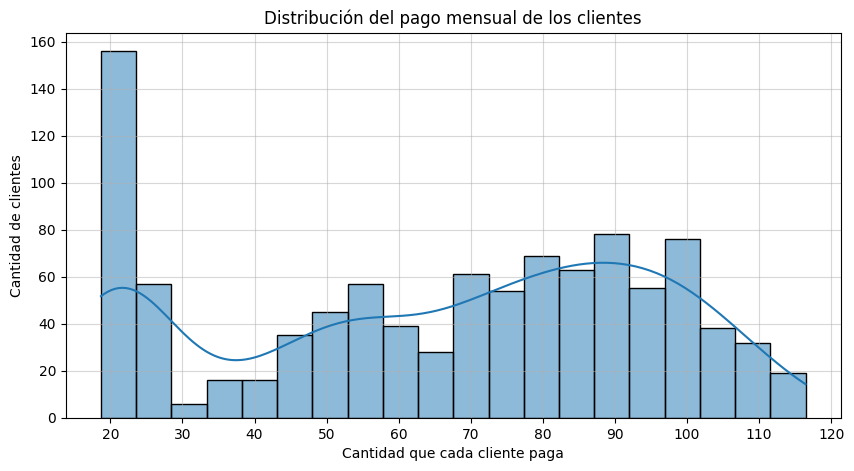

In [10]:
#distribución de la variable 'Monthly Charges'
plt.figure(figsize=(10, 5))
sns.histplot(dataChurn['MonthlyCharges'], kde=True,bins=20)
plt.title("Distribución del pago mensual de los clientes")
plt.xlabel("Cantidad que cada cliente paga")
plt.ylabel("Cantidad de clientes")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 200+10, step=10))
plt.plot()
#miramos la distribución de los datos
dataChurn['MonthlyCharges'].describe()

Se observa que aproximadamente el 16% de los clientes paga un valor cercano a 20 dólares. Adicionalmente, observamos que la media de pago mensual está alrededor de los 65 dólares.

count    1000.000000
mean     2287.719970
std      2216.274583
min        19.050000
25%       466.375000
50%      1419.250000
75%      3721.800000
max      8468.200000
Name: TotalCharges, dtype: float64

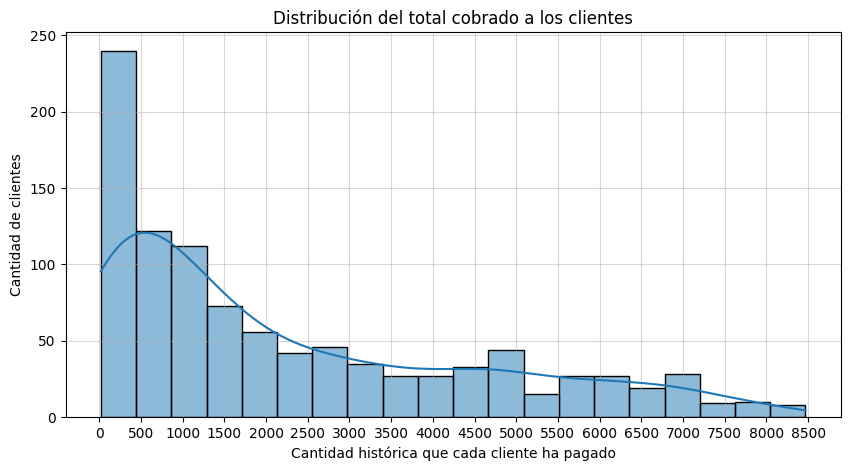

In [11]:

#distribución de la variable 'TotalCharges'
plt.figure(figsize=(10, 5))
sns.histplot(dataChurn['TotalCharges'], kde=True,bins=20)
plt.title("Distribución del total cobrado a los clientes")
plt.xlabel("Cantidad histórica que cada cliente ha pagado")
plt.ylabel("Cantidad de clientes")
plt.grid(True,alpha=0.5)
plt.xticks(ticks=np.arange(0, 10000, step=500))
plt.plot()
#miramos la distribución de los datos
dataChurn['TotalCharges'].describe()

Se observa que apróximadamente el 25% de los clientes han pagado menos de 500 dólares en total desde que llegaron a la compañia. En promedio los clientes han pagado 2287 dólares durante su vinculación con la compañia.

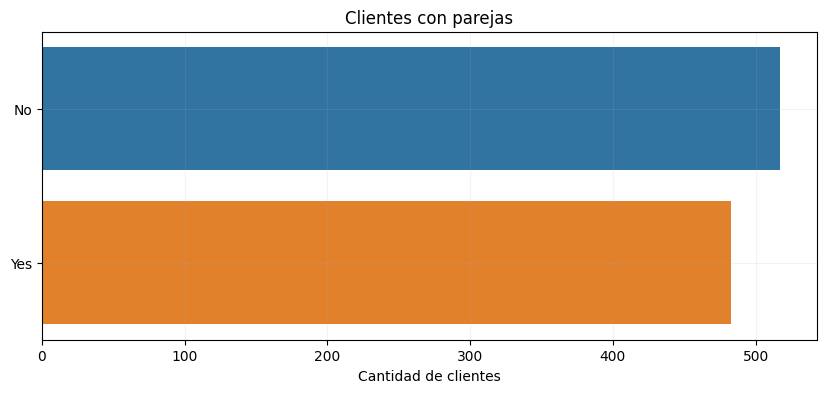

Partner
No     517
Yes    483
Name: count, dtype: int64


In [12]:
#distribución de la variable 'Partner'
plt.figure(figsize=(10,4))
sns.countplot(y='Partner', data=dataChurn, order=dataChurn['Partner'].value_counts().index)
plt.title('Clientes con parejas')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['Partner'].value_counts()
print(conteo)

En este gráfico observamos la cantidad de clientes con y sin pareja, la distribución es muy similar por lo tanto, no se considera un factor diferencial a la hora de hacer Churn.

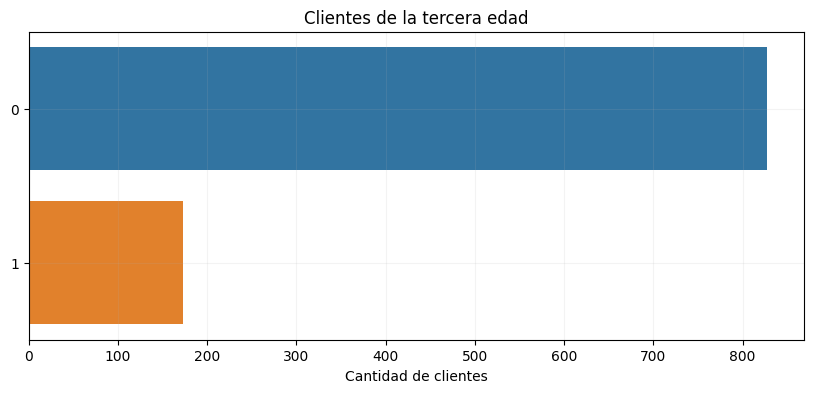

SeniorCitizen
0    827
1    173
Name: count, dtype: int64


In [13]:
#distribución de la variable 'SeniorCitizen'
plt.figure(figsize=(10,4))
sns.countplot(y='SeniorCitizen', data=dataChurn, order=dataChurn['SeniorCitizen'].value_counts().index)
plt.title('Clientes de la tercera edad')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['SeniorCitizen'].value_counts()
print(conteo)

Se observa que la mayoría de clientes no hacen parte de la tercera edad. En total, más del 80% no hacen parte de este grupo etario.

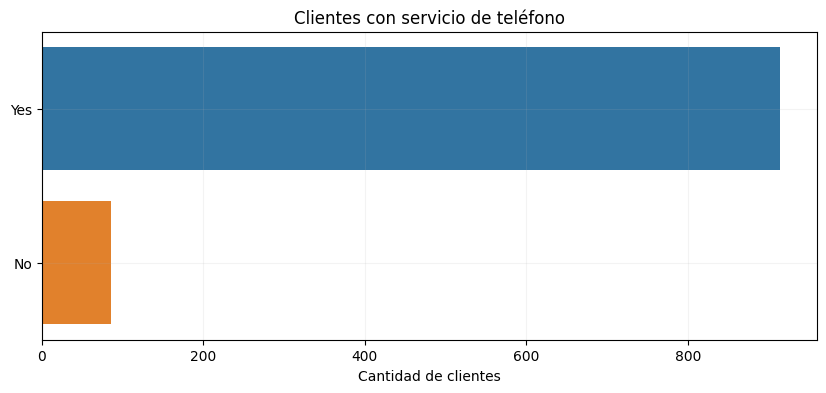

PhoneService
Yes    914
No      86
Name: count, dtype: int64


In [14]:

#distribución de la variable 'PhoneService'
plt.figure(figsize=(10,4))
sns.countplot(y='PhoneService', data=dataChurn, order=dataChurn['PhoneService'].value_counts().index)
plt.title('Clientes con servicio de teléfono')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['PhoneService'].value_counts()
print(conteo)

Se observa que más del 90% de los clientes cuentan con un plan de telefonía con la empresa.

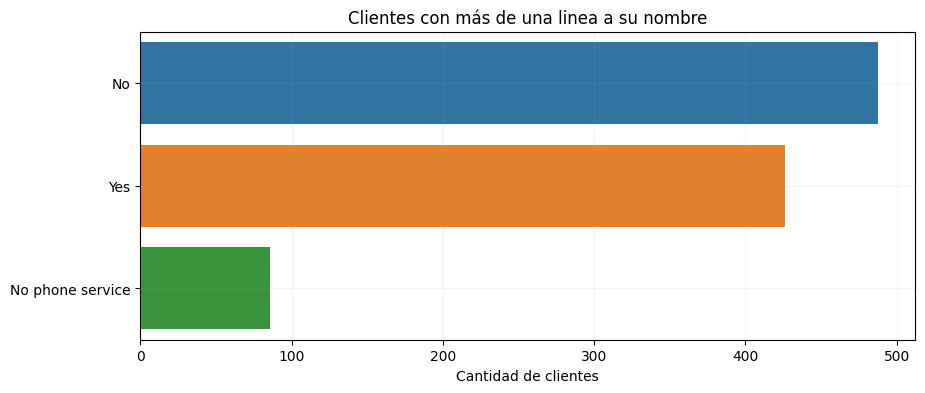

MultipleLines
No                  488
Yes                 426
No phone service     86
Name: count, dtype: int64


In [15]:

#distribución de la variable 'MultipleLines'
plt.figure(figsize=(10,4))
sns.countplot(y='MultipleLines', data=dataChurn, order=dataChurn['MultipleLines'].value_counts().index)
plt.title('Clientes con más de una linea a su nombre')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['MultipleLines'].value_counts()
print(conteo)

Se observa que el 48.8% de los clientes cuentan con una sola línea su nombre. Por otro lado,  el 42.6% sí tienen más de una línea a su nombre. Esto podría ser un factor diferencial a al hora de determinar el Churn. FInalmente, solo el 8.6% no cuenta con ninguna línea.

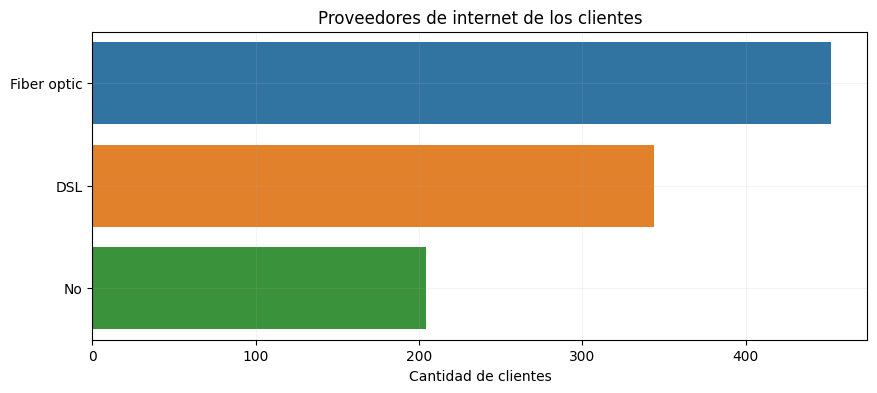

InternetService
Fiber optic    452
DSL            344
No             204
Name: count, dtype: int64


In [16]:

#distribución de la variable 'InternetService'
plt.figure(figsize=(10,4))
sns.countplot(y='InternetService', data=dataChurn, order=dataChurn['InternetService'].value_counts().index)
plt.title('Proveedores de internet de los clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['InternetService'].value_counts()
print(conteo)

Se observa que casi el 80% de los clientes tiene un proveedor de internet. El 45.2% están con Fiber Optic, mientras que el 34.4 % están con DSL. Por otro lado, el 20.4% no cuentan con un proveedor de internet.

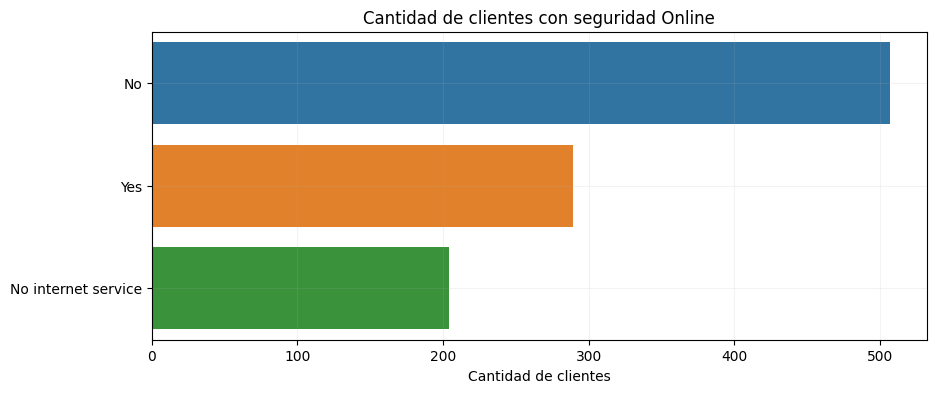

OnlineSecurity
No                     507
Yes                    289
No internet service    204
Name: count, dtype: int64


In [17]:

#distribución de la variable 'OnlineSecurity'
plt.figure(figsize=(10,4))
sns.countplot(y='OnlineSecurity', data=dataChurn, order=dataChurn['OnlineSecurity'].value_counts().index)
plt.title('Cantidad de clientes con seguridad Online')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['OnlineSecurity'].value_counts()
print(conteo)

Se observa que el 28.9% de los clientes cuentan con internet y con planes de seguridad online. Por otro lado, 50% de los clientes nop tienen plan de seguirdad Online.

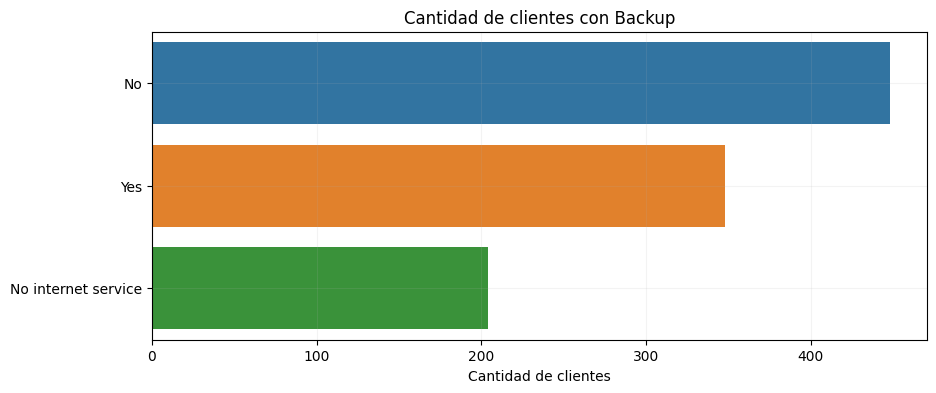

OnlineBackup
No                     448
Yes                    348
No internet service    204
Name: count, dtype: int64


In [18]:

#distribución de la variable 'OnlineBackup'
plt.figure(figsize=(10,4))
sns.countplot(y='OnlineBackup', data=dataChurn, order=dataChurn['OnlineBackup'].value_counts().index)
plt.title('Cantidad de clientes con Backup')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['OnlineBackup'].value_counts()
print(conteo)

Se observa que el 34.8 % de los clientes cuentan con plan de internet y plan de Backup. Por otro lado el 44.8% de los clientes tienen internet pero no plan de backup.

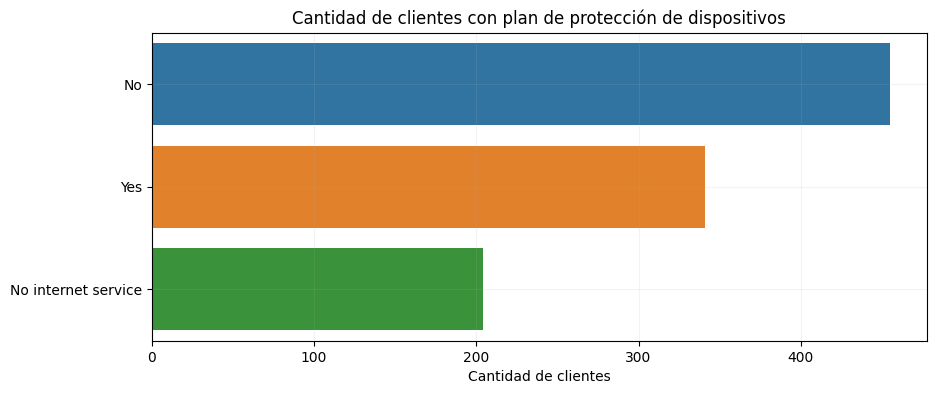

DeviceProtection
No                     455
Yes                    341
No internet service    204
Name: count, dtype: int64


In [19]:

#distribución de la variable 'DeviceProtection'
plt.figure(figsize=(10,4))
sns.countplot(y='DeviceProtection', data=dataChurn, order=dataChurn['DeviceProtection'].value_counts().index)
plt.title('Cantidad de clientes con plan de protección de dispositivos')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['DeviceProtection'].value_counts()
print(conteo)

Se observa que el 45.5 % de los clientes tiene plan de internet pero no tienen plan de protección a dispositivos. Mientras que el 34.1% tienen plan de protección a dispositivos y plan de internet.

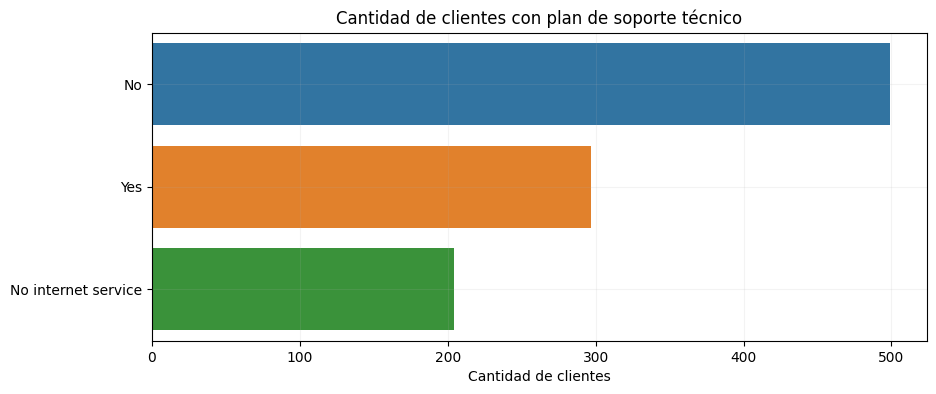

TechSupport
No                     499
Yes                    297
No internet service    204
Name: count, dtype: int64


In [20]:


#distribución de la variable 'TechSupport'
plt.figure(figsize=(10,4))
sns.countplot(y='TechSupport', data=dataChurn, order=dataChurn['TechSupport'].value_counts().index)
plt.title('Cantidad de clientes con plan de soporte técnico')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['TechSupport'].value_counts()
print(conteo)

Se observa que el 49.9% de los clientes tienen plan de internet pero no cuentan con plan de soporte técnico. Mientras que el 29.7% de los clientes tienen plan de internet y plan de soporte técnico.

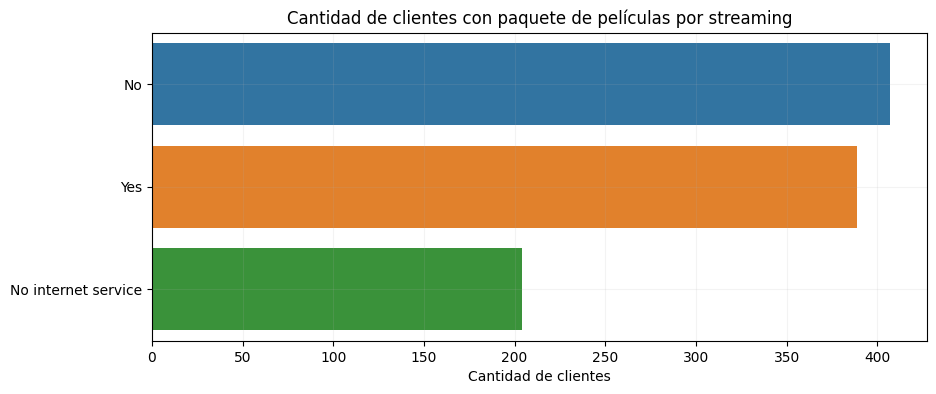

StreamingMovies
No                     407
Yes                    389
No internet service    204
Name: count, dtype: int64


In [21]:

#distribución de la variable 'StreamingMovies'
plt.figure(figsize=(10,4))
sns.countplot(y='StreamingMovies', data=dataChurn, order=dataChurn['StreamingMovies'].value_counts().index)
plt.title('Cantidad de clientes con paquete de películas por streaming')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['StreamingMovies'].value_counts()
print(conteo)

Se observa que el 40.7% de los clientes tiene plan de internet pero no tiene paquete de películas por estreaming. Mientras que, el 38.9% tiene plan de internet y paquete películas de streaming.

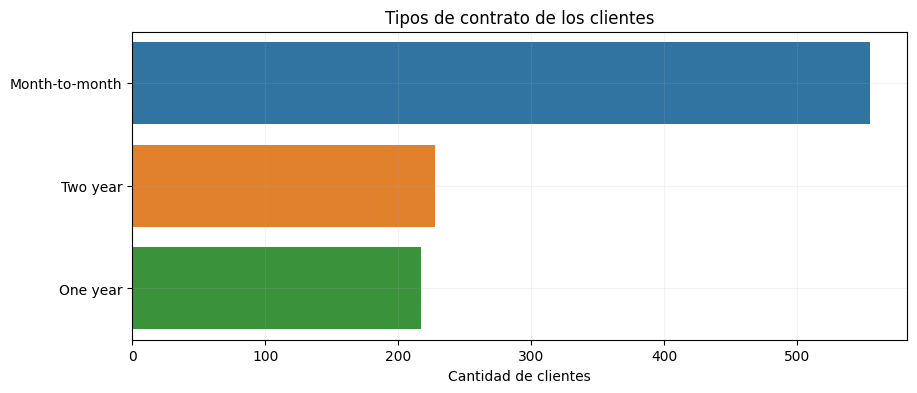

Contract
Month-to-month    555
Two year          228
One year          217
Name: count, dtype: int64


In [22]:


#distribución de la variable 'Contract'
plt.figure(figsize=(10,4))
sns.countplot(y='Contract', data=dataChurn, order=dataChurn['Contract'].value_counts().index)
plt.title('Tipos de contrato de los clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['Contract'].value_counts()
print(conteo)

Se observa que el 55.5% de clientes tienen el contrato mes a mes, el 22.8% tiene contrato a 2 años, mientras que el 21.7% de los clientes tiene contrato a 1 año.

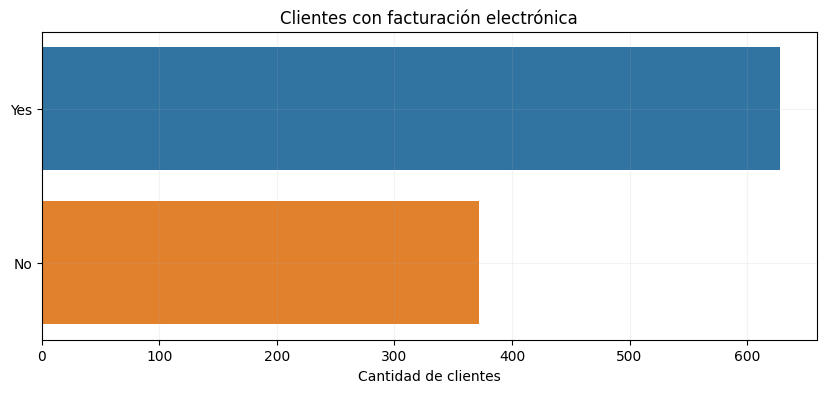

PaperlessBilling
Yes    628
No     372
Name: count, dtype: int64


In [23]:

#distribución de la variable 'PaperlessBilling'
plt.figure(figsize=(10,4))
sns.countplot(y='PaperlessBilling', data=dataChurn, order=dataChurn['PaperlessBilling'].value_counts().index)
plt.title('Clientes con facturación electrónica')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['PaperlessBilling'].value_counts()
print(conteo)

Se observa que el 62.8% de los clientes cuenta con facturación electrónica mientras que el 37.2% no la tiene.

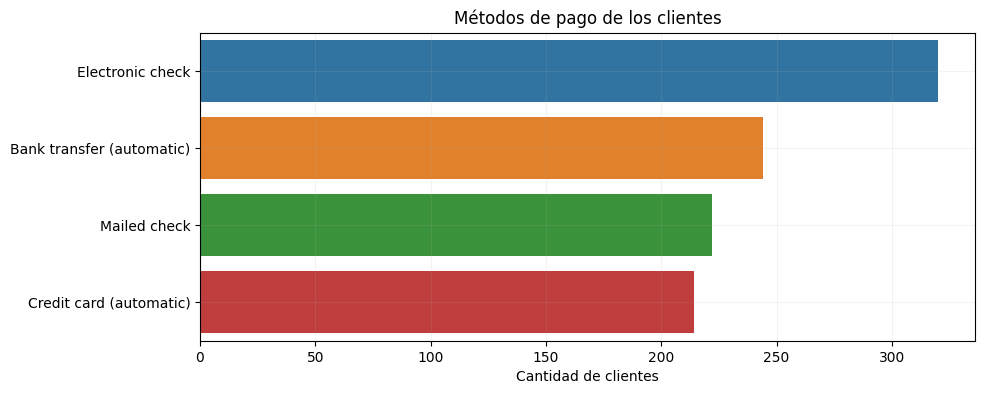

PaymentMethod
Electronic check             320
Bank transfer (automatic)    244
Mailed check                 222
Credit card (automatic)      214
Name: count, dtype: int64


In [24]:

#distribución de la variable 'PaymentMethod'
plt.figure(figsize=(10,4))
sns.countplot(y='PaymentMethod', data=dataChurn, order=dataChurn['PaymentMethod'].value_counts().index)
plt.title('Métodos de pago de los clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['PaymentMethod'].value_counts()
print(conteo)

Se observa que el método de pago más común entre los clientes es el cheque electrónico. Por otro lado, podemos decir que casi el 50% de los clientes prefiere debito automático ya sea por transferencia de banco o por tarjeta de crédito.

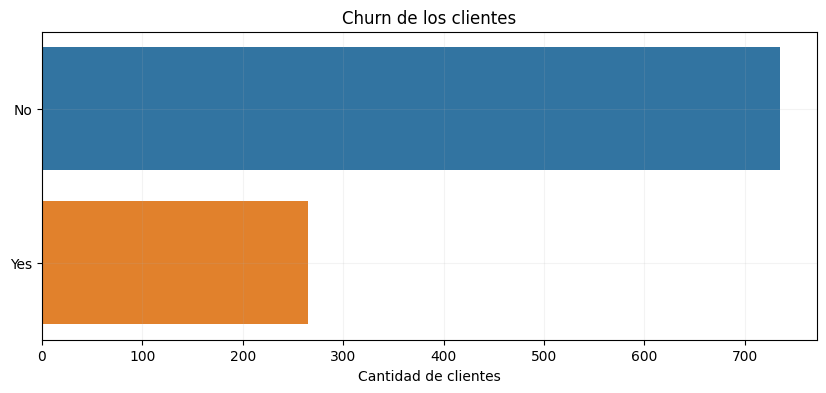

Churn
No     735
Yes    265
Name: count, dtype: int64


In [25]:

#distribución de la variable 'Churn'
plt.figure(figsize=(10,4))
sns.countplot(y='Churn', data=dataChurn, order=dataChurn['Churn'].value_counts().index)
plt.title('Churn de los clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True,alpha=0.15)
plt.show()
#Imprimimos el total de los valores
conteo = dataChurn['Churn'].value_counts()
print(conteo)

Una vez revisamos todas las features, analizamos la que será nuestra variable objetivo. En este caso vemos que la tasa de clientes que hacen Churn se ubican en el 26.5%

# A/B Testing


In [26]:
data = dataChurn
np.random.seed(42)
lista_df_dia= []
data['dia_semana'] = np.random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], size=len(data))
grupos_por_dia = {dia: data[data['dia_semana'] == dia].drop('dia_semana', axis=1) for dia in data['dia_semana'].unique()}
for dia, grupo in grupos_por_dia.items():
    lista_df_dia.append(grupo)

In [27]:
lista_df_dia[2]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
5,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
6,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
13,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
17,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2405-LBMUW,Female,0,Yes,Yes,61,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),50.70,3088.75,No
942,3454-JFUBC,Male,1,No,No,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.00,1396.00,No
963,9547-ITEFG,Male,0,Yes,Yes,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.60,897.75,No
973,9972-VAFJJ,Female,1,Yes,No,53,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45,No


In [28]:
dias=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
resultadosT=pd.DataFrame()
for dataframe, dia in zip(lista_df_dia, dias):
    X = dataframe.iloc[:, 0:20]
    Y = dataframe['Churn']
    X_conjunto_a, X_conjunto_b, y_conjunto_a, y_conjunto_b = train_test_split(X, Y, test_size=0.5, random_state=42)
    cojuntoADict = X_conjunto_a.to_dict(orient='records')
    json_data_A = json.dumps(cojuntoADict)
    respuestasTreeModel=invocarApi(1,json_data_A)
    cojuntoBDict = X_conjunto_a.to_dict(orient='records')
    json_data_B = json.dumps(cojuntoBDict)
    RespuestasBaseline=invocarApi(2,json_data_B)
    df_resultados = pd.concat([crearDFresultados(respuestasTreeModel,dia,'Mejor Modelo'),
                           crearDFresultados(RespuestasBaseline,dia,'Base Line')], ignore_index=True)
    resultadosT = pd.concat([resultadosT,df_resultados],ignore_index=True)

In [29]:
resultadosT

,customerID,Probabilidad_Churn_No,Probabilidad_Churn_Yes,Result,Modelo,Dia
0,6963-EZQEE,0.993,0.007,No,Mejor Modelo,Lunes
1,6821-JPCDC,0.722,0.278,No,Mejor Modelo,Lunes
2,9036-CSKBW,0.824,0.176,No,Mejor Modelo,Lunes
3,7029-RPUAV,0.625,0.375,No,Mejor Modelo,Lunes
4,0530-IJVDB,0.875,0.125,No,Mejor Modelo,Lunes
...,...,...,...,...,...,...
993,0117-LFRMW,0.926,0.074,No,Base Line,Domingo
994,8213-TAZPM,0.876,0.124,No,Base Line,Domingo
995,6732-FZUGP,0.878,0.122,No,Base Line,Domingo
996,6229-LSCKB,0.231,0.769,Yes,Base Line,Domingo


In [30]:
resultadosT = pd.merge(resultadosT, dataChurn[['Churn', 'customerID']], on='customerID', how='left')

In [31]:
resultadosT

,customerID,Probabilidad_Churn_No,Probabilidad_Churn_Yes,Result,Modelo,Dia,Churn
0,6963-EZQEE,0.993,0.007,No,Mejor Modelo,Lunes,No
1,6821-JPCDC,0.722,0.278,No,Mejor Modelo,Lunes,No
2,9036-CSKBW,0.824,0.176,No,Mejor Modelo,Lunes,No
3,7029-RPUAV,0.625,0.375,No,Mejor Modelo,Lunes,Yes
4,0530-IJVDB,0.875,0.125,No,Mejor Modelo,Lunes,No
...,...,...,...,...,...,...,...
993,0117-LFRMW,0.926,0.074,No,Base Line,Domingo,Yes
994,8213-TAZPM,0.876,0.124,No,Base Line,Domingo,No
995,6732-FZUGP,0.878,0.122,No,Base Line,Domingo,No
996,6229-LSCKB,0.231,0.769,Yes,Base Line,Domingo,No


In [32]:
resultadosT["Acerto"] = (resultadosT['Result'] == resultadosT['Churn']).astype(int)

In [33]:
resultadosT

,customerID,Probabilidad_Churn_No,Probabilidad_Churn_Yes,Result,Modelo,Dia,Churn,Acerto
0,6963-EZQEE,0.993,0.007,No,Mejor Modelo,Lunes,No,1
1,6821-JPCDC,0.722,0.278,No,Mejor Modelo,Lunes,No,1
2,9036-CSKBW,0.824,0.176,No,Mejor Modelo,Lunes,No,1
3,7029-RPUAV,0.625,0.375,No,Mejor Modelo,Lunes,Yes,0
4,0530-IJVDB,0.875,0.125,No,Mejor Modelo,Lunes,No,1
...,...,...,...,...,...,...,...,...
993,0117-LFRMW,0.926,0.074,No,Base Line,Domingo,Yes,0
994,8213-TAZPM,0.876,0.124,No,Base Line,Domingo,No,1
995,6732-FZUGP,0.878,0.122,No,Base Line,Domingo,No,1
996,6229-LSCKB,0.231,0.769,Yes,Base Line,Domingo,No,0


In [34]:
ResultadosMejorModelo=resultadosT[resultadosT['Modelo']=='Mejor Modelo']
ResultadosBaseline=resultadosT[resultadosT['Modelo']=='Base Line']

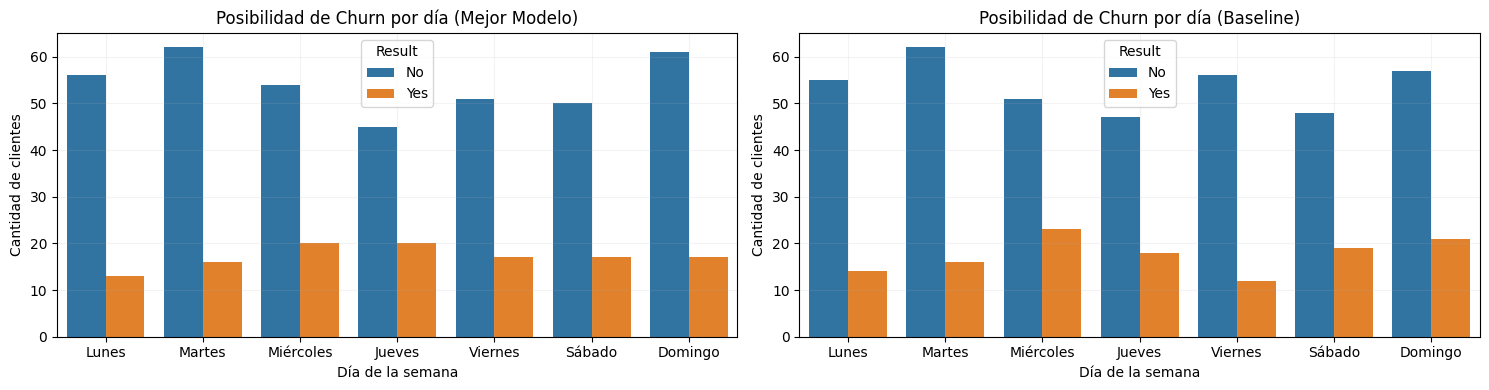

In [35]:
# Crear un subplot con dos gráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Gráfico 1: ResultadosMejorModelo
sns.countplot(x='Dia', data=ResultadosMejorModelo, hue='Result', ax=axes[0])
axes[0].set_title('Posibilidad de Churn por día (Mejor Modelo)')
axes[0].set_xlabel('Día de la semana')
axes[0].set_ylabel('Cantidad de clientes')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.15)

# Gráfico 2: ResultadosBaseline
sns.countplot(x='Dia', data=ResultadosBaseline, hue='Result', ax=axes[1])
axes[1].set_title('Posibilidad de Churn por día (Baseline)')
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Cantidad de clientes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.15)

plt.tight_layout()
plt.show()

Se observa que en ambos modelos los días martes y domingo son los días con mayor probabilidad de no churn. Mientras que el día miércoles es cuando más probabilidad de Churn hay

In [36]:
df_proba_MejorModelo = ResultadosMejorModelo.groupby('Dia')[['Probabilidad_Churn_No','Probabilidad_Churn_Yes']].mean().reset_index()

In [37]:
df_proba_Baseline = ResultadosBaseline.groupby('Dia')[['Probabilidad_Churn_No','Probabilidad_Churn_Yes']].mean().reset_index()

In [38]:
dict_dias={'Lunes':1,'Martes':2,'Miércoles':3,'Jueves':4,'Viernes':5,'Sábado':6,'Domingo':7}

In [39]:
df_proba_MejorModelo['numero_dia'] = df_proba_MejorModelo['Dia'].map(dict_dias)
df_proba_MejorModelo=df_proba_MejorModelo.sort_values(by='numero_dia')
df_proba_Baseline['numero_dia'] = df_proba_Baseline['Dia'].map(dict_dias)
df_proba_Baseline=df_proba_Baseline.sort_values(by='numero_dia')

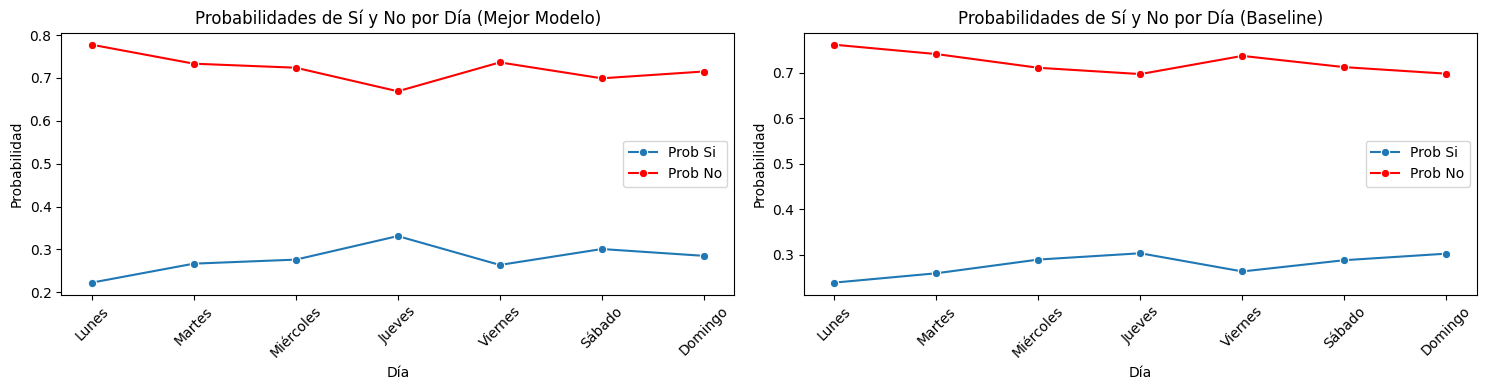

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.lineplot(x='Dia', y='Probabilidad_Churn_Yes', data=df_proba_MejorModelo, marker='o', ax=axes[0], label='Prob Si')
sns.lineplot(x='Dia', y='Probabilidad_Churn_No', data=df_proba_MejorModelo, marker='o', color='red', ax=axes[0], label='Prob No')
axes[0].set_title('Probabilidades de Sí y No por Día (Mejor Modelo)')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Probabilidad')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()


sns.lineplot(x='Dia', y='Probabilidad_Churn_Yes', data=df_proba_Baseline, marker='o', ax=axes[1], label='Prob Si')
sns.lineplot(x='Dia', y='Probabilidad_Churn_No', data=df_proba_Baseline, marker='o', color='red', ax=axes[1], label='Prob No')
axes[1].set_title('Probabilidades de Sí y No por Día (Baseline)')
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Probabilidad')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el subplot
plt.show()


Se observa que las probabilidades para ambos modelos se comportan de manera similar. En este gráfica ya se puede observar con mayor claridad que a diferencia de lo que se pensó anteriormente, el día jueves es el día con mayor probabilidad. Diferente a lo que se pensaba antes, donde se afirmaba que era el día miércoles.

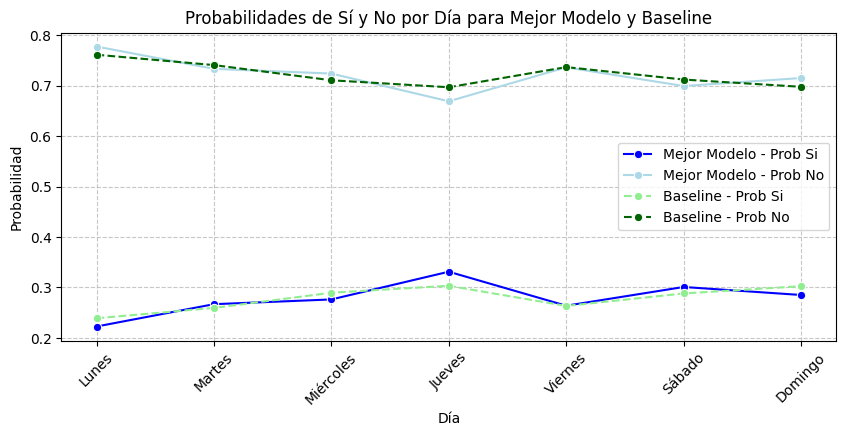

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sns.lineplot(x='Dia', y='Probabilidad_Churn_Yes', data=df_proba_MejorModelo, marker='o', ax=axes, label='Mejor Modelo - Prob Si', color='blue')
sns.lineplot(x='Dia', y='Probabilidad_Churn_No', data=df_proba_MejorModelo, marker='o', ax=axes, label='Mejor Modelo - Prob No', color='lightblue')

sns.lineplot(x='Dia', y='Probabilidad_Churn_Yes', data=df_proba_Baseline, marker='o', ax=axes, label='Baseline - Prob Si', linestyle='dashed', color='lightgreen')
sns.lineplot(x='Dia', y='Probabilidad_Churn_No', data=df_proba_Baseline, marker='o', ax=axes, label='Baseline - Prob No', linestyle='dashed', color='darkgreen')

axes.set_title('Probabilidades de Sí y No por Día para Mejor Modelo y Baseline')
axes.set_xlabel('Día')
axes.set_ylabel('Probabilidad')
axes.tick_params(axis='x', rotation=45)
axes.legend()

axes.grid(True, linestyle='--', alpha=0.7)

plt.show()


Se observa que en ambos modelos los comportamientos son muy similares. Las probabilidades en ambos modelos se comportan de igual manera, por lo que usar cualquiera de los dos modelos sería válido.

Las diferencias de la predicción no son significativas, se puede observar a lo largo de los dias que no es grande la diferencia excepto los lunes que se puede apreciar un poco mas la diferencia entre modelos, esto indica que los modelos predicen de cierta manera igual los dias.

### T-Test

Se realiza un T-test para revisar las diferencias dentro de un modelo y el otro en cuento a la probalidad de predicción de churn

In [42]:
df_proba_MejorModelo

,Dia,Probabilidad_Churn_No,Probabilidad_Churn_Yes,numero_dia
2,Lunes,0.777507,0.222493,1
3,Martes,0.733256,0.266744,2
4,Miércoles,0.723865,0.276135,3
1,Jueves,0.668908,0.331092,4
6,Viernes,0.736309,0.263691,5
5,Sábado,0.699164,0.300836,6
0,Domingo,0.715038,0.284962,7


In [43]:
df_proba_Baseline

,Dia,Probabilidad_Churn_No,Probabilidad_Churn_Yes,numero_dia
2,Lunes,0.761203,0.238797,1
3,Martes,0.740679,0.259321,2
4,Miércoles,0.710568,0.289432,3
1,Jueves,0.696754,0.303246,4
6,Viernes,0.736676,0.263324,5
5,Sábado,0.711985,0.288015,6
0,Domingo,0.697628,0.302372,7


In [44]:
list_proba_no_best=df_proba_MejorModelo['Probabilidad_Churn_No']
list_proba_no_base=df_proba_Baseline['Probabilidad_Churn_No']

In [45]:
resultado_t_test_no = ttest_ind(list_proba_no_best,list_proba_no_base)
print("Resultados del t-test para 'No':")
print("Estadística t:", resultado_t_test_no.statistic)
print("Valor p:", resultado_t_test_no.pvalue)

Resultados del t-test para 'No':
Estadística t: -0.01314650398567902
Valor p: 0.9897269507176012


Hipotesis nula: existe diferencia significativa en las medias de predicción de los dos modelos.

De acuerdo con el resultado del P value notamos que podemos rechazar la hipotesis nula lo que nos lleva a decir que las diferencias entre las medias de prediccion NO son significativas, esto se puede comprobar en las gráficas que se realizaron con las medias, estas demuestran poca variacion en las predicciones sean Churn o no Churn

#Porcentaje de éxito del modelo prediciendo casos de churn por día
---

In [46]:
def contarDias(df,dia):
    filtro = df[df['Dia'] == dia]

    return len(filtro)

In [47]:
resultados_aciertos_base = ResultadosBaseline.groupby('Dia')['Acerto'].sum().reset_index()
resultados_aciertos_mejor = ResultadosMejorModelo.groupby('Dia')['Acerto'].sum().reset_index()
resultados_aciertos_base['Conteo'] = resultados_aciertos_base.apply(lambda row: contarDias(ResultadosBaseline, row['Dia']), axis=1)
resultados_aciertos_mejor['Conteo'] = resultados_aciertos_base.apply(lambda row: contarDias(ResultadosMejorModelo, row['Dia']), axis=1)
resultados_aciertos_base["Porcentaje_Acierto"]=(resultados_aciertos_base['Acerto']/resultados_aciertos_base['Conteo'])*100
resultados_aciertos_mejor["Porcentaje_Acierto"]=(resultados_aciertos_mejor['Acerto']/resultados_aciertos_mejor['Conteo'])*100

resultados_aciertos_mejor['numero_dia'] = resultados_aciertos_mejor['Dia'].map(dict_dias)
resultados_aciertos_mejor=resultados_aciertos_mejor.sort_values(by='numero_dia')
resultados_aciertos_base['numero_dia'] = resultados_aciertos_base['Dia'].map(dict_dias)
resultados_aciertos_base=resultados_aciertos_base.sort_values(by='numero_dia')

In [48]:
resultados_aciertos_base

,Dia,Acerto,Conteo,Porcentaje_Acierto,numero_dia
2,Lunes,60,69,86.956522,1
3,Martes,61,78,78.205128,2
4,Miércoles,58,74,78.378378,3
1,Jueves,52,65,80.000000,4
6,Viernes,57,68,83.823529,5
5,Sábado,58,67,86.567164,6
0,Domingo,59,78,75.641026,7


In [49]:
resultados_aciertos_mejor

,Dia,Acerto,Conteo,Porcentaje_Acierto,numero_dia
2,Lunes,57,69,82.608696,1
3,Martes,61,78,78.205128,2
4,Miércoles,61,74,82.432432,3
1,Jueves,52,65,80.000000,4
6,Viernes,56,68,82.352941,5
5,Sábado,54,67,80.597015,6
0,Domingo,57,78,73.076923,7


Se observa que para todos los días de la semana ambos modelos fueron eficientes. En general se obtuvo más del 70% de acierto en todos los escenarios, siendo lunes y los viernes los días con mayor porcentaje de acierto.  

#Incremento o decremento porcentual diario de predicción
---

In [50]:
for idx, (row_mejor, row_base) in enumerate(zip(resultados_aciertos_mejor.iterrows(), resultados_aciertos_base.iterrows())):
    _, mejor = row_mejor
    _, base = row_base

    diferencia = base['Porcentaje_Acierto']-mejor['Porcentaje_Acierto']

    if diferencia > 0:
        print(f"Dia {mejor['Dia']}: Arboles de decision (Mejor modelo) - Diferencia: {diferencia}%")
    elif diferencia < 0:
        print(f"Dia {base['Dia']}: Regresion Lógistica (Modelo Base) - Diferencia: {diferencia}%")
    else:
        print(f"Dia {base['Dia']}: Modelos iguales")

Dia Lunes: Arboles de decision (Mejor modelo) - Diferencia: 4.34782608695653%
Dia Martes: Modelos iguales
Dia Miércoles: Regresion Lógistica (Modelo Base) - Diferencia: -4.054054054054063%
Dia Jueves: Modelos iguales
Dia Viernes: Arboles de decision (Mejor modelo) - Diferencia: 1.4705882352941302%
Dia Sábado: Arboles de decision (Mejor modelo) - Diferencia: 5.970149253731336%
Dia Domingo: Arboles de decision (Mejor modelo) - Diferencia: 2.564102564102569%


Se observa que las métricas de ambos modelos son muy similares, a diferencia como se pensaba al incio en donde se asumía que el árbol de decisiones tendría un rendimiento superior al modelo de regresión logíostica, por lo que cualquiera de los dos modelos responde a la necesidad de negocio para identificar posibles clientes de Churn.